# Analyze a volitile but not good performing stock 

In [51]:
import yfinance as yf
import pandas as pd

### It is impossible to find a good performing stock ahead of time. But it is easier to identify volitile stock which has a has a lot of price actions. In this analysis, we try to test the models with TSLA stock over last year. The stock is famous to be volatile, but it was not doing well in the last 1 year.

In [2]:
data = yf.download("TSLA", period='12mo')

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-16,180.369995,185.809998,178.839996,184.130005,184.130005,121136800
2023-03-17,184.520004,186.220001,177.330002,180.130005,180.130005,133197100
2023-03-20,178.080002,186.440002,176.350006,183.250000,183.250000,129684400
2023-03-21,188.279999,198.000000,188.039993,197.580002,197.580002,153391400
2023-03-22,199.300003,200.660004,190.949997,191.149994,191.149994,150376400
2023-03-23,195.259995,199.309998,188.649994,192.220001,192.220001,144193900
2023-03-24,191.649994,192.360001,187.149994,190.410004,190.410004,116312400
2023-03-27,194.419998,197.389999,189.940002,191.809998,191.809998,120851600
2023-03-28,192.000000,192.350006,185.429993,189.190002,189.190002,98654600


## Problem statement

Given the last 5 days closing price (day1 to day5), if you buy at the opening on the next day (day6) , would you be able to make 3% gain in the next 5 days (day6 to day10) ? i.e., by just looking at the closing price of the last 5 days, should i place a trade on day6 with the hope of getting a 3% return on the next 5 days ? 

###  Create the input data frame. i.e. day1 to day5 dataframe

In [4]:
past_data = pd.DataFrame()

In [5]:
past_data['day1'] = data[['Close']].shift(9,axis=0)
past_data['day2'] = data[['Close']].shift(8,axis=0)
past_data['day3'] = data[['Close']].shift(7,axis=0)
past_data['day4'] = data[['Close']].shift(6,axis=0)
past_data['day5'] = data[['Close']].shift(5,axis=0)
past_data = past_data.reset_index()
past_data = past_data.drop(['Date'],axis=1)
past_data = past_data.drop([0,1,2,3,4,5,6,7,8,9])

In [6]:
past_data.head(10)

,day1,day2,day3,day4,day5
10,180.130005,183.250000,197.580002,191.149994,192.220001
11,183.250000,197.580002,191.149994,192.220001,190.410004
12,197.580002,191.149994,192.220001,190.410004,191.809998
13,191.149994,192.220001,190.410004,191.809998,189.190002
14,192.220001,190.410004,191.809998,189.190002,193.880005
15,190.410004,191.809998,189.190002,193.880005,195.279999
16,191.809998,189.190002,193.880005,195.279999,207.460007
17,189.190002,193.880005,195.279999,207.460007,194.770004
18,193.880005,195.279999,207.460007,194.770004,192.580002
19,195.279999,207.460007,194.770004,192.580002,185.520004


### get the maximum price the stock will reach on day6 to day10

In [7]:
future_data = pd.DataFrame()

In [8]:
future_data['day6'] = data[['High']].shift(4,axis=0)
future_data['day7'] = data[['High']].shift(3,axis=0)
future_data['day8'] = data[['High']].shift(2,axis=0)
future_data['day9'] = data[['High']].shift(1,axis=0)
future_data['day10'] = data[['High']]
future_data = future_data.reset_index()
future_data = future_data.drop(['Date'],axis=1)
future_data = future_data.drop([0,1,2,3,4,5,6,7,8,9])


In [9]:
future_data.head(5)

,day6,day7,day8,day9,day10
10,192.360001,197.389999,192.350006,195.289993,197.330002
11,197.389999,192.350006,195.289993,197.330002,207.789993
12,192.350006,195.289993,197.330002,207.789993,202.690002
13,195.289993,197.330002,207.789993,202.690002,198.740005
14,197.330002,207.789993,202.690002,198.740005,190.679993


In [10]:
next_five_days_max = pd.DataFrame()

In [11]:
next_five_days_max['future_max'] = future_data[["day6", "day7", "day8", "day9", "day10"]].max(axis=1)

### get the opening price of day 6

In [12]:
day6_open = pd.DataFrame()

In [13]:
day6_open['day6_open'] = data[['Open']].shift(4,axis=0)
day6_open = day6_open.reset_index()
day6_open = day6_open.drop(['Date'],axis=1)
day6_open = day6_open.drop([0,1,2,3,4,5,6,7,8,9])

In [14]:
day6_open.head(10)

,day6_open
10,191.649994
11,194.419998
12,192.000000
13,193.130005
14,195.580002
15,197.529999
16,199.910004
17,197.320007
18,190.520004
19,183.080002


### calculate the percentage gain from day6 open to the max from day6 to day10

In [15]:
gain_percent =pd.DataFrame()

In [16]:
next_five_days_max.head()

,future_max
10,197.389999
11,207.789993
12,207.789993
13,207.789993
14,207.789993


In [17]:
gain_percent['gain'] = next_five_days_max['future_max'] - day6_open['day6_open']
gain_percent['gain'] = gain_percent['gain']/day6_open['day6_open']

In [18]:
gain_percent.head()

,gain
10,0.029950
11,0.068769
12,0.082240
13,0.075907
14,0.062430


### this is the output trade or no trade on day6

In [19]:
trade = gain_percent['gain'] > 0.03

In [20]:
trade.head()

10    False
11     True
12     True
13     True
14     True
Name: gain, dtype: bool

## Try to idendify buy opportunities with KNN

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [22]:
X_train, X_test, y_train, y_test = train_test_split(past_data, trade, random_state=42)


In [23]:
knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])
knn_pipe.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

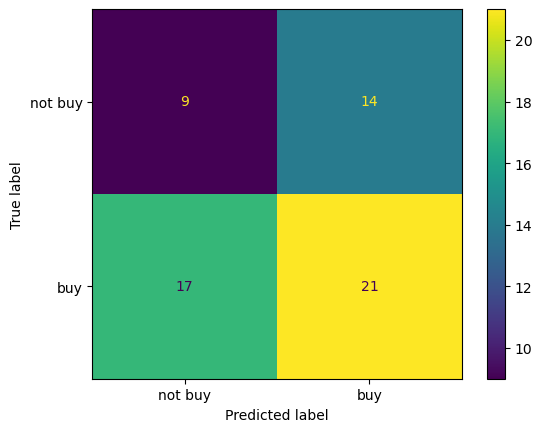

In [24]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

knn_preds = knn_pipe.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, knn_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


This is reasonably good for the simple model. Looking at the predicted buy column, it makes correct trading decision 3/5 times. 

## Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
log_pipe = Pipeline([('scale', StandardScaler()), ('log', LogisticRegression())])
log_pipe.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()), ('log', LogisticRegression())])

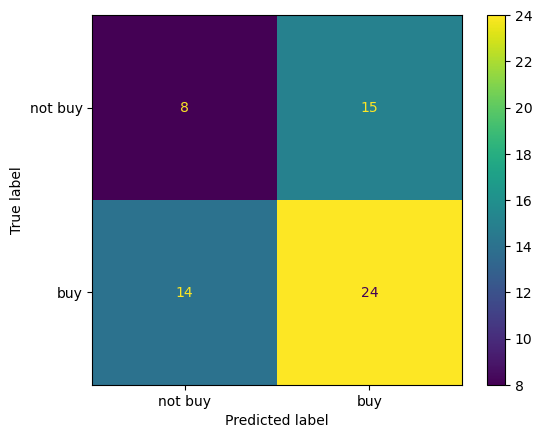

In [50]:
log_preds = log_pipe.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, log_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


This model is slighly better than KNN in term of trade decision accracy. and it also get more correct buy decision.

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
tree_pred = tree_model.predict(X_test)

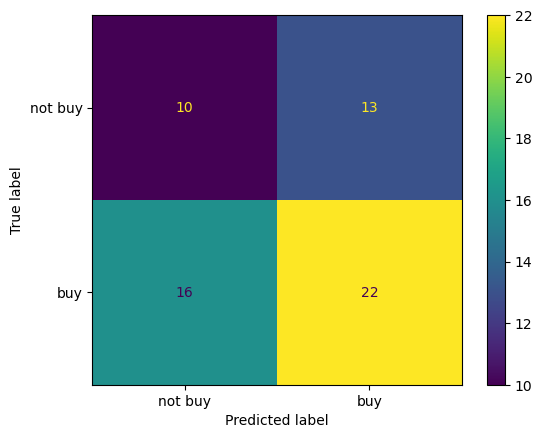

In [30]:
voo_confusion_mat = confusion_matrix(y_test, tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


This is slightly worse than KNN

## SVM

In [31]:
from sklearn.svm import SVC


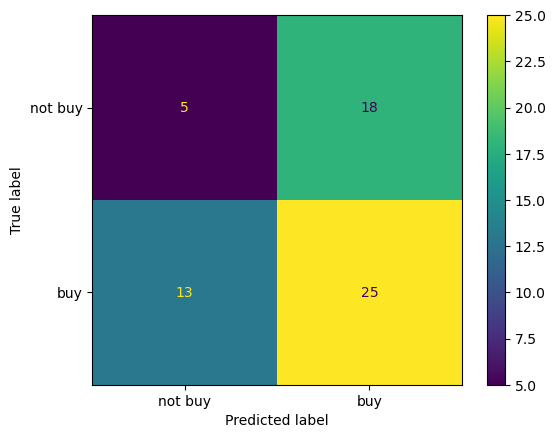

In [32]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, svc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()

This is also slightly worse than KNN and logistic regression

## We can further improve the models by tuning some parameters

## Improve KNN

In [33]:
from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(knn_pipe, param_grid={'knn__n_neighbors': range(1, 33, 2)}, scoring = 'roc_auc')
knn_grid.fit(X_train, y_train)
best_k = knn_grid.best_params_['knn__n_neighbors']


In [34]:
best_k

21

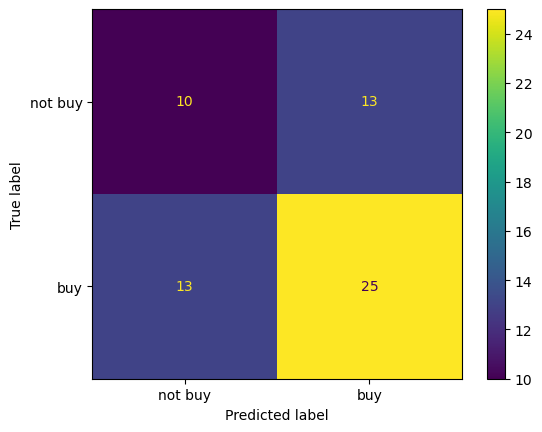

In [35]:
knn_new_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=3))])
knn_new_pipe.fit(X_train, y_train)
knn_new_preds = knn_new_pipe.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, knn_new_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()

The trading decision accuracy has improved, and it also recommend more correct trade

## Improving Logistic Regression

In [36]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [37]:
import numpy as np

Cs = np.logspace(-2, 2)
coef_list = []

for C in Cs:
    lgr = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = C, random_state=42, max_iter = 1000).fit(scaled_X_train, y_train)
    coef_list.append(list(lgr.coef_[0]))
    print(lgr.coef_)


[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[-0.06537461  0.          0.          0.          0.        ]]
[[-0.15003203  0.          0.          0.          0.        ]]
[[-0.22094869  0.          0.          0.          0.        ]]
[[-0.28084603  0.          0.          0.          0.        ]]
[[-0.33192824  0.          0.          0.          0.        ]]
[[-0.37553004  0.          0.          0.          0.        ]]
[[-0.41275324  0.          0.          0.          0.        ]]
[[-0.44446038  0.          0.          0.          0.        ]]
[[-0.47141414  0.          0.          0.          0.        ]]
[[-0.494259  0.        0.        0.        0.      ]]
[[-0.51358733  0.          0.          0.          0.        ]]
[[-0.52988029  0.          0.          0.          0.        ]]
[[-0.54358807  0.          0.          0.          0.        ]]
[[-0.55509533  0.         

In [38]:
np.logspace(-2, 2)

array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3.55648031e-01,
       4.29193426e-01, 5.17947468e-01, 6.25055193e-01, 7.54312006e-01,
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])

In [39]:
new_lgr = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.01, random_state=42, max_iter = 1000).fit(scaled_X_train, y_train)


In [40]:
new_log_preds = new_lgr.predict(scaled_X_test)


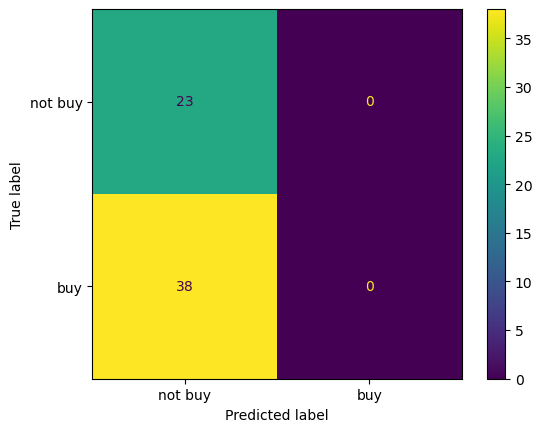

In [41]:
voo_confusion_mat = confusion_matrix(y_test, new_log_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


It is getting too conservative, not recommending any trade

## Improving Decision Tree


In [42]:
params = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
         'max_depth': [2, 5, 10],
         'min_samples_split': [0.1, 0.2, 0.05]}

In [43]:
new_tree_grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params).fit(X_train, y_train)


In [44]:
new_tree_pred = new_tree_grid.predict(X_test)

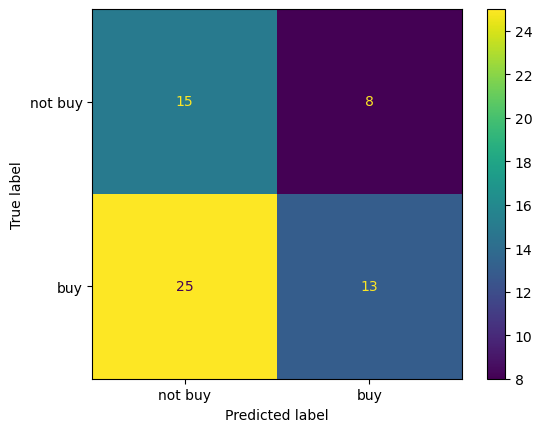

In [45]:
voo_confusion_mat = confusion_matrix(y_test, new_tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


It is also getting more conservative, even though the trade decision accuracy is about the same

## Improving SVM

In [46]:
params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}

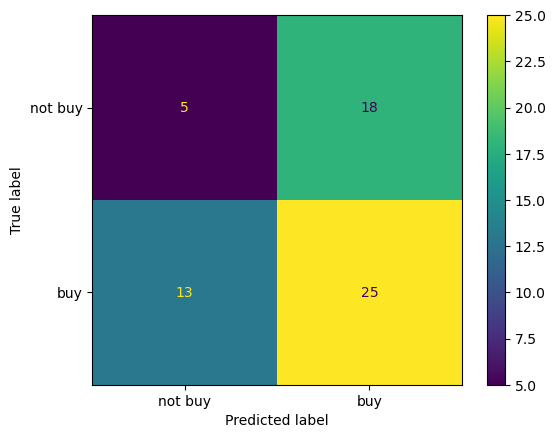

In [47]:
svc_grid = GridSearchCV(SVC(), param_grid=params).fit(X_train, y_train)
svc_grid.fit(X_train, y_train)
svc_new_pred = svc_grid.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, svc_new_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


This also does not impove much compare to the simplier models

## From this analysis, we can see that with simple model, we can get good trading decision for a volatile stock. In this case the KNN model with improved parameters perform the best.